Nombres : Diego Bravo       19.806.607-9
          Matias Morales    20.305.081-K
          Vicente Reyes     20.564.697-3
          Jose Sepulveda    20.563.679-k
          Sofia Silva       20.376.851-6
          Carlos Tapia      20.563.351-0
          

En el presente trabajo de investigación se plantea la resolución de un problema de aplicación ingenieril por tres metodos de cálculo de raices para ecuaciones no lineales, para el cual realizaremos la comparación de eficiencia entre los metodos de bisección, falsa posición y falsa posición modificado. Con esto se apunta a conocer cual de los procedimientos es más efectivo y cual es posiblemente más consistente.

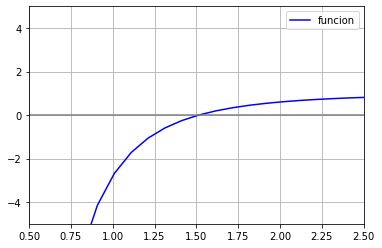

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def h(x):
    return (1-(400/(9.81*( (3*x+((x**2)/2))**3)))*((3+x)))
v = [0.5,2.5,-5,5]
np.seterr(divide='ignore', invalid='ignore')
x=np.linspace(0,10,100)
plt.plot(x,h(x),'blue',label='funcion')
plt.axhline(0, color="gray")

plt.legend(loc=1)
plt.axis(v)
plt.grid()


In [60]:
# METODO DE BISECCIÓN
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
import time



#Calcular la raiz real de la ecuación f(x)=xe^x - pi = 0. Suponer que se desea que el error sea menor que e=0.000001
def f(x): return (1-(400/(9.81*( (3*x+((x**2)/2))**3)))*((3+x)))
inicio = time.time()
a=0.5
b=2.5
e=0.01
r=0
S=[a]
Error=[1]
relativo = [np.absolute((b-a)/(b))]
Conv = []
lista1=[]
resultados1=[]
while relativo[r]>e and r<=10 :
    print("Iteración : ",r,"-",10)
    r = r+1
    c=(a+b)/2
    print("La solución aproximada en la i-esima iteración es x=",c)
    resultados1.append(c)
    if f(c)==0:
        print("La solución obtiene en x=",c)
    else:
        if f(a)*f(c)>0:
            a=c
        else:
            b=c
    Anterior = r-1
    S.append(c)
    absoluto = np.absolute(S[r]-S[Anterior])
    rela = np.absolute((S[r]-S[Anterior])/S[r])
    relativo.append(rela)
    Error.append(absoluto)
    lista1.append(absoluto*100)
    Razon = (Error[r]/Error[1])
    Conv.append(Razon)
    print("Error absoluto =",absoluto)
    #print("Error relativo =",relativo[r])
    #print("Razón convergencia =",Conv)
    print("------------------------------------------")
fin = time.time()
lista1.pop(0)
print("El tiempo de ejecucion es : ",fin-inicio)

Iteración :  0 - 10
La solución aproximada en la i-esima iteración es x= 1.5
Error absoluto = 1.0
------------------------------------------
Iteración :  1 - 10
La solución aproximada en la i-esima iteración es x= 2.0
Error absoluto = 0.5
------------------------------------------
Iteración :  2 - 10
La solución aproximada en la i-esima iteración es x= 1.75
Error absoluto = 0.25
------------------------------------------
Iteración :  3 - 10
La solución aproximada en la i-esima iteración es x= 1.625
Error absoluto = 0.125
------------------------------------------
Iteración :  4 - 10
La solución aproximada en la i-esima iteración es x= 1.5625
Error absoluto = 0.0625
------------------------------------------
Iteración :  5 - 10
La solución aproximada en la i-esima iteración es x= 1.53125
Error absoluto = 0.03125
------------------------------------------
Iteración :  6 - 10
La solución aproximada en la i-esima iteración es x= 1.515625
Error absoluto = 0.015625
--------------------------

En la ejecución del primer algoritmo podemos notar que este concluye antes de alcanzar la decima iteración debido a que alcanzó un indice de error inferior al 1%, también podemos destacar que la solución encontrada se aproxima mucho al valor real pero falla por algunas milesimas.

In [61]:
# METODO FALSA POSICION
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
import time


def f(x): return (1-(400/(9.81*( (3*x+((x**2)/2))**3)))*((3+x)))
inicio = time.time()
Estado = 'True'
xi=0.5
xu=2.5
xr=xi
e=1
i = 0
fi=f(xi)
fu=f(xu)
imax = 10
lista2=[]
resultados2 = []

while Estado == 'True' :
    xrant=xr
    xr = xu-fu*(xi-xu)/(fi-fu)
    resultados2.append(xr)
    fr=f(xr)
    i = i + 1
    print("Iteración : ",i,"-",imax)
    if xr != 0:
        eabs = np.absolute((xr-xrant)/(xr))*100
        print("Error Abs : ",eabs)
        lista2.append(eabs)
    test = fi*fr
    print(fi," / ",fr," / ",fu)
    if test < 0:
        xu = xr
        fu = f(xu)
    else:
        xi = xr
        fi = f(xi)
    if i >= imax or eabs <= e:
        Estado = 'False'
        if eabs < e:
            print("El error alcanzo el 1%")
    print("La solución aproximada en la i-esima iteración es x=",xr)
    print("------------------------------------------")
lista2.pop(0)
fin = time.time()
print("El tiempo de ejecucion es : ",fin-inicio)
    
    

Iteración :  1 - 10
Error Abs :  79.5987604730635
-32.258214681590175  /  0.7998732909044218  /  0.8130321830223047
La solución aproximada en la i-esima iteración es x= 2.4508314768807655
------------------------------------------
Iteración :  2 - 10
Error Abs :  1.9637932029769514
-32.258214681590175  /  0.7861233019120436  /  0.7998732909044218
La solución aproximada en la i-esima iteración es x= 2.403629170603679
------------------------------------------
Iteración :  3 - 10
Error Abs :  1.920300498660325
-32.258214681590175  /  0.7717920956618608  /  0.7861233019120436
La solución aproximada en la i-esima iteración es x= 2.3583419189735153
------------------------------------------
Iteración :  4 - 10
Error Abs :  1.8757780745838666
-32.258214681590175  /  0.7568937949442244  /  0.7717920956618608
La solución aproximada en la i-esima iteración es x= 2.3149191726878975
------------------------------------------
Iteración :  5 - 10
Error Abs :  1.8302932043515767
-32.258214681590175 

El segundo método de falsa posición cae en un problema de estancamiento, que se produce debido a los limites del intervalo correspondiente a cada iteración. Debido a esto el método no logra alcanzar la solución en menos de 10 iteraciones con un índice de error menor al 1%.

In [62]:
# METODO FALSA POSICION MODIFICADA
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
import time


def f(x): return (1-(400/(9.81*( (3*x+((x**2)/2))**3)))*((3+x)))
inicio = time.time()
Estado = 'True'

xi=0.5
xu=2.5
xr=xi
e=1
i = 0
il = 0
iu = 0
fi=f(xi)
fu=f(xu)
imax = 10
lista3 = []
resultados3 = []

while Estado == 'True' :
    xrant=xr
    xr = xu-fu*(xi-xu)/(fi-fu)
    resultados3.append(xr)
    fr=f(xr)
    i = i + 1
    print("Iteración : ",i,"-",imax)
    if xr != 0:
        eabs = np.absolute((xr-xrant)/(xr))*100
        print("Error Abs : ",eabs)
        lista3.append(eabs)
    test = fi*fr
    print(fi," / ",fr," / ",fu)
    if test < 0:
        xu = xr
        fu = f(xu)
        iu = 0
        il = il + 1
        if il >= 2:
            fi=fi/2
    else:
        xi = xr
        fi = f(xi)
        il = 0
        iu = iu + 1
        if iu >= 2 :
            fu=fu/2
        else:
            ea = 0
    if i >= imax or eabs <= e:
        Estado = 'False'
        if eabs < e:
            print("El error alcanzo el 1%")
            
    print("La solución aproximada en la i-esima iteración es x=",xr)
    print("----------------------------------------------------------------")
fin = time.time()
lista3.pop(0)
print("El tiempo de ejecucion es : ",fin-inicio)


Iteración :  1 - 10
Error Abs :  79.5987604730635
-32.258214681590175  /  0.7998732909044218  /  0.8130321830223047
La solución aproximada en la i-esima iteración es x= 2.4508314768807655
----------------------------------------------------------------
Iteración :  2 - 10
Error Abs :  1.9637932029769514
-32.258214681590175  /  0.7861233019120436  /  0.7998732909044218
La solución aproximada en la i-esima iteración es x= 2.403629170603679
----------------------------------------------------------------
Iteración :  3 - 10
Error Abs :  3.8213270328321705
-16.129107340795088  /  0.7569795283164076  /  0.7861233019120436
La solución aproximada en la i-esima iteración es x= 2.315159360122186
----------------------------------------------------------------
Iteración :  4 - 10
Error Abs :  7.213096996955555
-8.064553670397544  /  0.6923149683738206  /  0.7569795283164076
La solución aproximada en la i-esima iteración es x= 2.159399760822064
----------------------------------------------------

Ya teniendo todos los resultados obtenidos entre los diferentes métodos empleados podemos concluir que todos los resultados fueron diferentes, el segundo método no llego exactamente al resultado optimo a diferencia del primero y tercer método, ya que el primer método logro llegar, pero en la iteración numero 7, siendo una de las capaces de optimizar el resultado, y el ultimo método alcanzo en la iteracion numero 9 con un error del 1%.

A partir de los resultados, podemos concluir que el método mas optimizado de los tres fue el método de falsa posición modificada, ya como se dijo en la sección de resultados, este método es como el segundo pero mejor, ya que este método combina la bisección y el método de la secante.

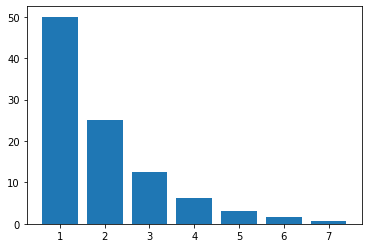

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar([1,2,3,4,5,6,7] ,lista1)
plt.show()

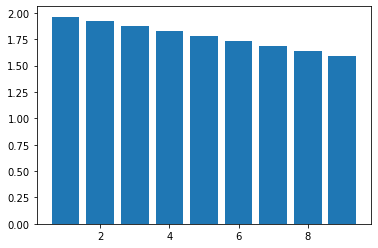

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar([1,2,3,4,5,6,7,8,9] , lista2)
plt.show()

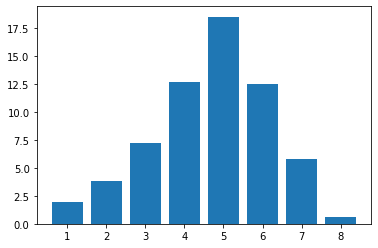

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar([1,2,3,4,5,6,7,8] , lista3)
plt.show()

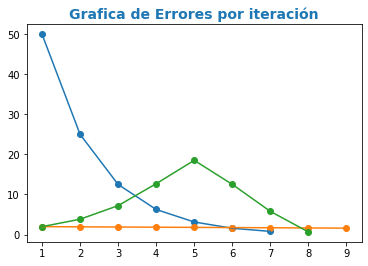

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Grafica de Errores por iteración', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.plot([1,2,3,4,5,6,7] , lista1)
ax.plot([1,2,3,4,5,6,7,8,9] , lista2)
ax.plot([1,2,3,4,5,6,7,8] , lista3)
ax.scatter(x = [1,2,3,4,5,6,7], y = lista1)
ax.scatter(x = [1,2,3,4,5,6,7,8,9], y = lista2)
ax.scatter(x = [1,2,3,4,5,6,7,8], y = lista3)

plt.show()

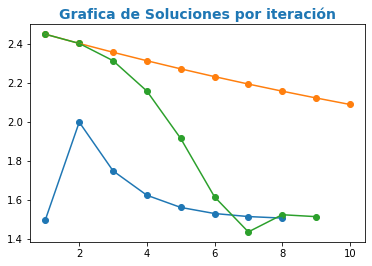

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Grafica de Soluciones por iteración', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.plot([1,2,3,4,5,6,7,8] , resultados1)
ax.plot([1,2,3,4,5,6,7,8,9,10] , resultados2)
ax.plot([1,2,3,4,5,6,7,8,9] , resultados3)
ax.scatter(x = [1,2,3,4,5,6,7,8], y = resultados1)
ax.scatter(x = [1,2,3,4,5,6,7,8,9,10], y = resultados2)
ax.scatter(x = [1,2,3,4,5,6,7,8,9], y = resultados3)

plt.show()